# Calculate the Euclidean distance between two clouds

In this notebook, we will analyze and compare 3D point cloud data from different experimental cases. The data consists of 3D coordinates (x, y, z) that represent various spatial distributions of points, referred to as "clouds." 

To quantify the spatial difference between two 3D point clouds, we computed the Euclidean distance between point $A_i=\left(x_{A_i},y_{A_i},z_{A_i}\right)$ in cloud A and every point $B_i\ =\left(x_{B_j},\ y_{B_j},\ z_{B_j}\right)$ in cloud B. For each  ${A_i}$, the minimum Euclidean distance was selected to identify the nearest neighbouring point in cloud B. The Euclidean distance ${d_{A_i-B_k}}$ between point ${A_i}$ and each pair point ${B_j}$ was calculated using the following formula:
$$
d_{A_i-B_j}=\min_j{\sqrt{\left(x_{B_j}-x_{A_i}\right)^2+\left(y_{B_j}-y_{A_i}\right)^2+\left(z_{B_j}-z_{A_i}\right)^2}}
$$
The distance provides a quantitative measure for “closeness” or “similarity” between points in a multidimensional space, where a value of 0 indicates perfect alignment or overlap between the points.

After computing the distances, we calculated simple statistics, such as the peak (mode), mean, and median of the distance distributions. These statistics provide insights into the spatial relationships between the clouds.

The distributions of computed Euclidean distances for each comparison were also visualised using a Kernel Density Estimation (KDE) to facilitate a visual assessment between experimental cases. 

These analyses were used to generate figure 2, panels E, J, O, P, Q, R and T.

In [1]:
# Import packages
import os
import pandas as pd

# Import custom helper file
import helper as h


## Create output folder and find the experiment files
Ensure that the experiment files downloaded from EBRAINS are in the data folder

In [2]:
# Data folder
data_folder = os.path.join("..", "data")

# Check if output folder exist, if not create the folder
output_folder = os.path.join("..", "output")
if not os.path.exists(output_folder):
   os.makedirs(output_folder)
   print("The new directory is created!")

## Define cases for comparison

In [3]:
data = [ 
        {'panel': ['E'] *2, 
        'case_1': ['R106_Pha','R106_Pha'],
        'case_2': ['R109_Pha','R113_BDA'],
        'comparison' : [1,2]
                         },      
        {'panel': ['J'] *2,
        'case_1': ['D46_BDA','D46_BDA'],
        'case_2': ['D45_BDA','M28_Fr'],
        'comparison' : [1,2]
                         },
        {'panel': ['O'] *2,
        'case_1': ['D51_Fr','D51_Fr'],
        'case_2': ['D52_Fr','D45_Fr'],
        'comparison' : [1,2]
                         },
        {'panel': ['P']*2,
        'case_1': ['R106_Pha','R106_Pha'],
        'case_2': ['D46_BDA','D51_Fr'],
        'comparison' : [1,2]
                         },
        {'panel': ['Q']*2,
        'case_1': ['R109_Pha','R109_Pha'],
        'case_2': ['D45_BDA','D52_Fr'],
        'comparison' : [1,2]
                         },
        {'panel': ['R']*2,
        'case_1': ['R113_BDA','R113_BDA'],
        'case_2': [ 'M28_Fr','D45_Fr'],
        'comparison' : [1,2]
                         },
        # the calculations for panel T need to be split up because a regular laptop/PC does not have the working 
        # memory to process such more than 10000 points at once.
        {'panel': ['T'] *6,  
        'case_1': [
                    ['R106_Pha'],
                    ['R109_Pha'], 
                    ['R113_BDA'],
                    ['R106_Pha'],
                    ['R109_Pha'], 
                    ['R113_BDA']
                  ],
        'case_2': [ 
                    ['D46_BDA','D45_BDA', 'M28_Fr'],
                    ['D46_BDA','D45_BDA', 'M28_Fr'],
                    ['D46_BDA','D45_BDA', 'M28_Fr'],
                    ['D51_Fr', 'D52_Fr', 'D45_Fr'],
                    ['D51_Fr', 'D52_Fr', 'D45_Fr'],
                    ['D51_Fr', 'D52_Fr', 'D45_Fr']
                    ],
        'comparison' : [1,1,1,2,2,2]
                         }                                      
                       ]
case_overview = pd.concat([pd.DataFrame(d) for d in data], ignore_index=True)
case_overview.head()

,panel,case_1,case_2,comparison
0,E,R106_Pha,R109_Pha,1
1,E,R106_Pha,R113_BDA,2
2,J,D46_BDA,D45_BDA,1
3,J,D46_BDA,M28_Fr,2
4,O,D51_Fr,D52_Fr,1


The analysis is run for each panel in figure 2 according to the case comparisons defined above. Figures are saved using the panel letter (e.g. "comparison_panel_E.png" for panel E)


Comparison for panel E

            comparison      peak      mean   median
  R106_Pha vs R109_Pha  0.345062  0.796287  0.45255
  R106_Pha vs R113_BDA  0.387921  0.796287  0.45255


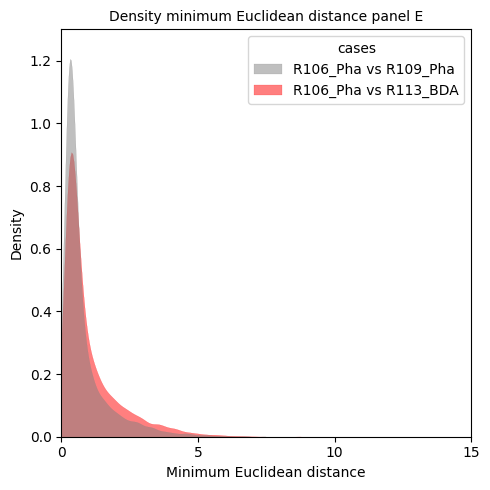


Comparison for panel J

          comparison      peak     mean    median
  D46_BDA vs D45_BDA  0.420046  0.91708  0.708831
   D46_BDA vs M28_Fr  1.301203  0.91708  0.708831


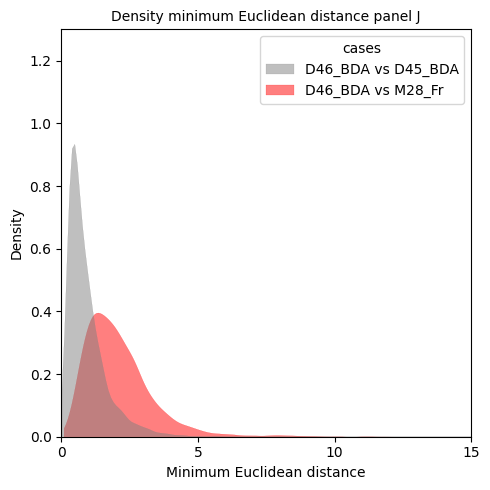


Comparison for panel O

        comparison      peak      mean   median
  D51_Fr vs D52_Fr  0.660512  1.485308  0.89758
  D51_Fr vs D45_Fr  0.524043  1.485308  0.89758


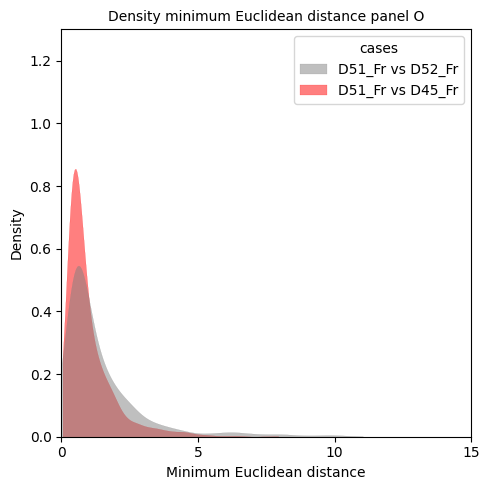


Comparison for panel P

           comparison      peak      mean    median
  R106_Pha vs D46_BDA  0.564990  1.508218  1.085645
   R106_Pha vs D51_Fr  4.008608  1.508218  1.085645


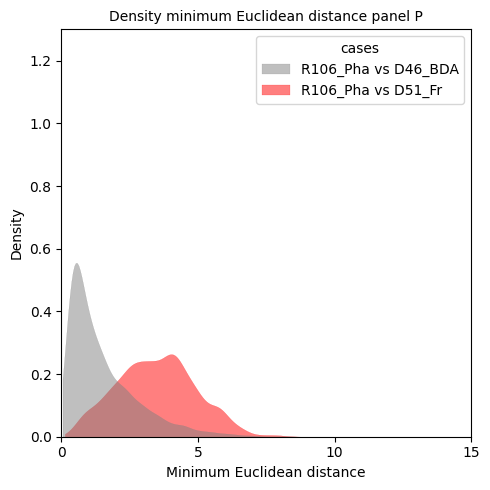


Comparison for panel Q

           comparison      peak      mean    median
  R109_Pha vs D45_BDA  0.796758  1.453837  1.129892
   R109_Pha vs D52_Fr  1.656966  1.453837  1.129892


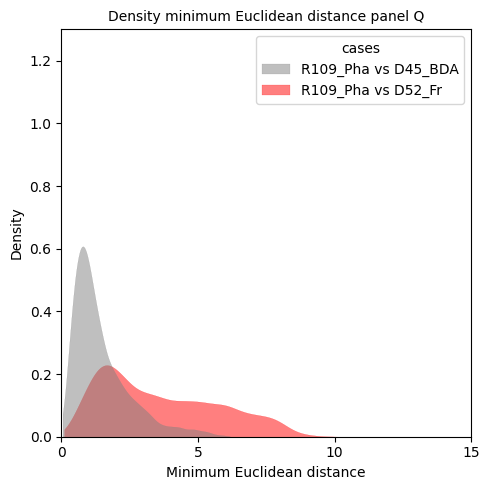


Comparison for panel R

          comparison      peak      mean    median
  R113_BDA vs M28_Fr  2.346302  2.282195  2.205375
  R113_BDA vs D45_Fr  0.595886  2.282195  2.205375


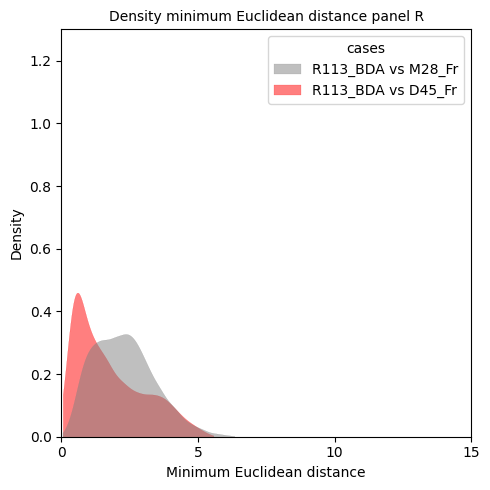


Comparison for panel T

                    comparison      peak      mean  median
  ABC combined vs FGH combined  0.474651  1.080338  0.7631
  ABC combined vs KLM combined  1.175830  1.080338  0.7631


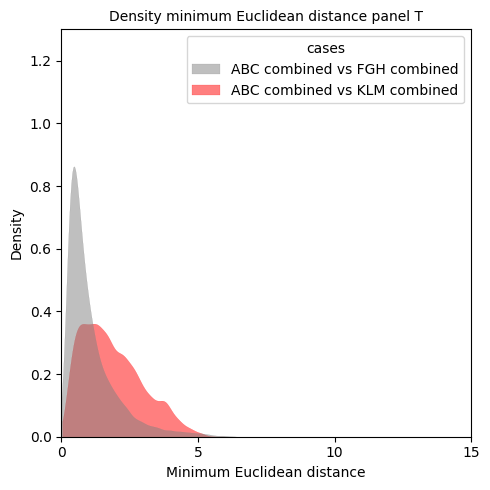

In [4]:
for panel in case_overview.panel.unique():
    
    print(f"\nComparison for panel {panel}\n")
    
    output_file = os.path.join(output_folder, f"comparison_panel_{panel}.png")

    dist_full = h.compare_clouds(case_overview, panel, data_folder)

    summary = h.calculate_stats(dist_full)

    h.plot_groupdata(dist_full, label='cases', title=f'Density minimum Euclidean distance panel {panel}' , filename=output_file)
    
    